# Handwritten Number Classifier

Simple model to classify handwritten numbers.

Model classifies 28x28 grayscale images from MNIST data set into one of the 10 digits.

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Load the input data
(x_train_org, y_train_org), (x_test_org, y_test_org) = keras.datasets.mnist.load_data()
x_train = x_train_org
y_train = y_train_org
x_test = x_test_org
y_test = y_test_org

Shape of data
-------------
Training data (60000, 28, 28)
Training labels (60000,)
Test data (10000, 28, 28)
Test labels (10000,)

Sample labels [5 0 4 1 9]

Train label frequencies
5: 5421
0: 5923
4: 5842
1: 6742
9: 5949
2: 5958
3: 6131
6: 5918
7: 6265
8: 5851

Sample Image
------------
Expected label 5


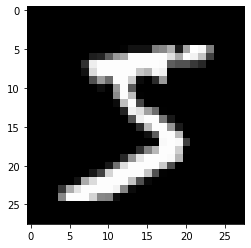

In [70]:
# Lets take a peek at the data.
print('Shape of data')
print('-------------')
print('Training data', x_train_org.shape)
print('Training labels', y_train_org.shape)
print('Test data', x_test_org.shape)
print('Test labels', y_test_org.shape)
print()
print('Sample labels', y_train_org[:5])
print()

# Frequency of Y labels.
vals, _, counts = tf.unique_with_counts(y_train_org)
print('Train label frequencies')
for i in range(len(vals)):
    print(f'{vals[i]}: {counts[i]}')
print()

# Sample image
index = 0
print('Sample Image')
print('------------')
plt.imshow(x_train_org[index], cmap='gray')
print('Expected label', y_train_org[index])

## Observations
* We have 60,000 28x28 grayscale images. Images are white on black background.
* Y labels are not one-hot encoded.
* We have 10,000 test images.

In [71]:
# Create the model
model = keras.Sequential([
    layers.Input(shape=(28, 28)),
    # Normalize grayscale values.
    layers.experimental.preprocessing.Rescaling(1.0/255.),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Use sparse_categorical_crossentropy instead of categorical_crossentropy because Y-labels are not one-hot encoded.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_13 (Rescaling)     (None, 28, 28)            0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2645 - accuracy: 0.9247
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1175 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0807 - accuracy: 0.9754
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0592 - accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0461 - accuracy: 0.9863: 0s - loss: 0.0463 
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0362 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0302 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0224 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0200 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 3s 2m

In [73]:
# Evaluate the model on the test set.
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 0.9784


[0.08541655540466309, 0.9783999919891357]

In [74]:
# Error analysis
results = np.zeros((10, 10), dtype='int32')
preds = model.predict(x_test)
for index in range(preds.shape[0]):
    expected = y_test[index]
    predicted = np.argmax(preds[index])
    results[expected][predicted] += 1
    
for index in range(10):
    row_total = np.sum(results[index])
    row_pct = results[index]/row_total*100.
    vals = []
    for col in range(10):
        vals.append(f'{row_pct[col]:.1f}')
    print(", ".join(vals))


98.7, 0.0, 0.1, 0.0, 0.4, 0.1, 0.1, 0.0, 0.3, 0.3
0.0, 99.1, 0.2, 0.3, 0.0, 0.1, 0.2, 0.1, 0.1, 0.0
0.7, 0.3, 95.8, 0.8, 1.1, 0.0, 0.1, 0.3, 1.0, 0.0
0.0, 0.0, 0.0, 98.1, 0.2, 0.6, 0.0, 0.1, 0.5, 0.5
0.1, 0.0, 0.0, 0.1, 99.3, 0.0, 0.1, 0.0, 0.0, 0.4
0.2, 0.0, 0.0, 0.7, 0.2, 97.4, 0.8, 0.0, 0.6, 0.1
0.6, 0.3, 0.1, 0.1, 0.8, 0.3, 97.4, 0.0, 0.3, 0.0
0.0, 0.6, 0.8, 0.3, 0.5, 0.0, 0.0, 96.7, 0.4, 0.8
0.6, 0.0, 0.2, 0.3, 0.3, 0.3, 0.0, 0.1, 97.8, 0.3
0.0, 0.2, 0.0, 0.1, 1.0, 0.5, 0.1, 0.0, 0.2, 97.9



    Expected: 9
    Predicted: 9
    Probability: 1.00


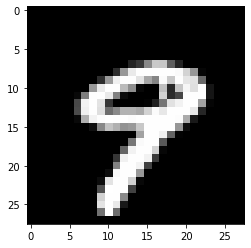

In [75]:
# Test the model.
index = 9
x_in = x_test[index]
plt.imshow(x_in, cmap='gray')
preds = model.predict(np.array([x_in]))[0]
pred_val = np.argmax(preds)
print(f"""
    Expected: {y_test[index]}
    Predicted: {pred_val}
    Probability: {preds[pred_val]:.2f}"""
)

## Conclusion

This is a very simple model to illustrate Keras and Deep Learning. It will not work as well in the real world for couple of reasons:
* Numbers may not be centered in the image or could be smaller relative to the image. 
* Background noise can be varied - lines, spots.

For the simple purpose of illustrating building a deep learning model in Keras, I think it serves well.

Next lets deploy this model and see how it does with recognizing real handwritten numbers!!

In [76]:
# Save the model
model.save('hw-num-classifier-model')

INFO:tensorflow:Assets written to: hw-num-classifier-model/assets
